<a href="https://colab.research.google.com/github/ebinjomonkottakal/DeepLearningProjects/blob/main/CottonDiseasePrediction(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d janmejaybhoi/cotton-disease-dataset

 99% 146M/148M [00:04<00:00, 41.8MB/s]
100% 148M/148M [00:04<00:00, 35.6MB/s]


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:

'''
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)'''

'\nfrom tensorflow.compat.v1 import ConfigProto\nfrom tensorflow.compat.v1 import InteractiveSession\n\nconfig = ConfigProto()\nconfig.gpu_options.per_process_gpu_memory_fraction = 0.5\nconfig.gpu_options.allow_growth = True\nsession = InteractiveSession(config=config)'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D
from keras.preprocessing import image
import numpy as np

In [ ]:
import zipfile
zipref = zipfile.ZipFile('/content/cotton-disease-dataset.zip','r')
zipref.extractall('/content')
zipref.close()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/Cotton Disease/train',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/Cotton Disease/test',
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [ ]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters = 32,padding='same',kernel_size = 3,activation = 'relu',input_shape = [64,64,3]))
cnn.add(keras.layers.MaxPool2D(pool_size = 2,strides = 2))
cnn.add(keras.layers.Conv2D(filters = 32,padding='same',kernel_size = 3,activation='relu'))
cnn.add(keras.layers.MaxPool2D(pool_size = 2,strides=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(units=128,activation='relu'))
cnn.add(keras.layers.Dense(units=4,activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
cnn.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics =['accuracy'])
history = cnn.fit(x = training_set,validation_data = test_set,epochs=20)

Epoch 1/20
61/61 [==============================] - 31s 331ms/step - loss: 1.1307 - accuracy: 0.5049 - val_loss: 0.8855 - val_accuracy: 0.6226
Epoch 2/20
61/61 [==============================] - 18s 300ms/step - loss: 0.7630 - accuracy: 0.7094 - val_loss: 0.8346 - val_accuracy: 0.6321
Epoch 3/20
61/61 [==============================] - 19s 317ms/step - loss: 0.6651 - accuracy: 0.7463 - val_loss: 0.7205 - val_accuracy: 0.6981
Epoch 4/20
61/61 [==============================] - 18s 299ms/step - loss: 0.5736 - accuracy: 0.7796 - val_loss: 0.4767 - val_accuracy: 0.8113
Epoch 5/20
61/61 [==============================] - 19s 314ms/step - loss: 0.4820 - accuracy: 0.8134 - val_loss: 0.3885 - val_accuracy: 0.8679
Epoch 6/20
61/61 [==============================] - 19s 318ms/step - loss: 0.4128 - accuracy: 0.8396 - val_loss: 0.4988 - val_accuracy: 0.8396
Epoch 7/20
61/61 [==============================] - 19s 317ms/step - loss: 0.4435 - accuracy: 0.8303 - val_loss: 0.6944 - val_accuracy: 0.7453

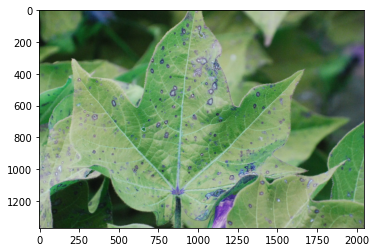

In [ ]:
import cv2
import matplotlib.pyplot as plt
test_img = cv2.imread('/content/DSC_1119.webp')
plt.imshow(test_img)

In [ ]:
test_img.shape

(1371, 2048, 3)

In [ ]:
test_image = keras.utils.load_img('/content/DSC_1119.webp',
                            target_size = (64,64))
test_image = keras.utils.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
result = result.ravel()
print("Largest element is:", max(result))





1/1 [==============================] - 0s 24ms/step
Largest element is: 0.6017898
